###### Limitations
- Sparsity of economic data to project the effects of COVID-19.
-- Most countries stopped the long term economic projection due to COVID-19 effect.
- Bias in data due to differences in testing rates and interventions between countries.

In [1]:
# Import the dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
os.getcwd()

'/Users/bunmiolakanmi/Documents/UoTBootCamp/HomeWork/Final Project/COVID19_ML/Covid19_ML/Covid_Data'

In [3]:
file_path = os.path.join('owid-covid-data.csv')

In [4]:
Covid_df=pd.read_csv(file_path)
Covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [5]:
Covid_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.332100e+04,73319.000000,72318.000000,6.411200e+04,64270.000000,72318.000000,72921.000000,72919.000000,71923.000000,63725.000000,...,67818.000000,46279.000000,68442.000000,69311.000000,53792.000000,53053.000000,34352.000000,62635.000000,70736.000000,68383.000000
mean,6.483604e+05,5163.218702,5173.310874,1.922440e+04,132.118874,116.158059,7686.630748,66.701478,66.513191,181.040500,...,19151.633654,13.280095,257.209887,7.797217,10.549999,32.648085,51.003676,3.035989,73.142309,0.727867
std,4.558905e+06,32293.698565,31994.920861,1.124768e+05,723.591323,660.632507,15139.275377,168.464921,141.551892,322.354028,...,19744.997195,19.922072,118.462777,3.940078,10.410033,13.466227,31.767892,2.467325,7.551801,0.150154
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.210000e+02,2.000000,5.857000,3.800000e+01,0.000000,0.000000,147.339000,0.140000,1.003000,5.711000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,8.049000e+03,59.000000,71.571000,2.500000e+02,2.000000,1.000000,1075.712000,6.385000,8.447000,30.806000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.657400e+04,672.000000,698.143000,2.385000e+03,16.000000,12.143000,7126.281000,57.107500,64.119500,192.383000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.190605e+08,880902.000000,739564.429000,2.639448e+06,17891.000000,14418.714000,144942.730000,8652.658000,2648.773000,2268.843000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [6]:
Covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
# calculate cases per capita, then add to the columns on the dataframe
cases_per_capita = Covid_df["population"]/Covid_df["total_cases"]
Covid_df["cases_per_capita"] = cases_per_capita

Covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_per_capita
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,24.857,1487.0,2.0,2.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.095711e+02
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,24.714,1489.0,2.0,2.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.092103e+02
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.089851e+02
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.085803e+02


In [8]:
# Extract the cases per capita for all the countries represented
cov=Covid_df[['iso_code',"cases_per_capita"]]
cov

,iso_code,cases_per_capita
0,AFG,3.892834e+07
1,AFG,3.892834e+07
2,AFG,3.892834e+07
3,AFG,3.892834e+07
4,AFG,3.892834e+07
...,...,...
74439,ZWE,4.095711e+02
74440,ZWE,4.092103e+02
74441,ZWE,4.089851e+02
74442,ZWE,4.085803e+02


In [9]:
# To get the total number of countries initially reported in the data
Covid_df['iso_code'].nunique()

215

In [10]:
# Remove unused columns
reduced_df=Covid_df.drop(columns=['new_cases_smoothed', 'total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million'])
reduced_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cases_per_capita
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,Africa,Zimbabwe,2021-03-08,36289.0,18.0,1487.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.095711e+02
74440,ZWE,Africa,Zimbabwe,2021-03-09,36321.0,32.0,1489.0,2.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.092103e+02
74441,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,1489.0,0.0,0.59,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.089851e+02
74442,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,1492.0,3.0,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,4.085803e+02


In [11]:
reduced_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'cases_per_capita'],
      dtype='object')

In [12]:
reduced_df.dtypes

iso_code                              object
continent                             object
location                              object
date                                  object
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
reproduction_rate                    float64
icu_patients                         float64
hosp_patients                        float64
weekly_icu_admissions_per_million    float64
weekly_hosp_admissions               float64
new_tests                            float64
total_tests                          float64
positive_rate                        float64
tests_per_case                       float64
tests_units                           object
total_vaccinations                   float64
people_vaccinated                    float64
people_fully_vaccinated              float64
new_vaccinations                     float64
stringency

In [13]:
# Remove more unused columns 
COV_GDP_df=reduced_df[['iso_code','gdp_per_capita', 'population', 'total_cases','new_cases', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations', 'stringency_index', 'cases_per_capita']]
COV_GDP_df

,iso_code,gdp_per_capita,population,total_cases,new_cases,new_deaths,icu_patients,hosp_patients,new_tests,new_vaccinations,stringency_index,cases_per_capita
0,AFG,1803.987,38928341.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
1,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
2,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
3,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
4,AFG,1803.987,38928341.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.33,3.892834e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
74439,ZWE,1899.775,14862927.0,36289.0,18.0,2.0,NaN,NaN,1764.0,3278.0,35.19,4.095711e+02
74440,ZWE,1899.775,14862927.0,36321.0,32.0,2.0,NaN,NaN,2056.0,243.0,NaN,4.092103e+02
74441,ZWE,1899.775,14862927.0,36341.0,20.0,0.0,NaN,NaN,2164.0,140.0,NaN,4.089851e+02
74442,ZWE,1899.775,14862927.0,36377.0,36.0,3.0,NaN,NaN,1706.0,118.0,NaN,4.085803e+02


In [14]:
# Remove cells with NaN values and check remaining countries after removing NaN's 
COV_GDP_df=COV_GDP_df.dropna()
COV_GDP_df['iso_code'].nunique()

17

In [15]:
COV_GDP_df

,iso_code,gdp_per_capita,population,total_cases,new_cases,new_deaths,icu_patients,hosp_patients,new_tests,new_vaccinations,stringency_index,cases_per_capita
4612,AUT,45436.686,9006400.0,353484.0,1592.0,50.0,421.0,2089.0,21246.0,1287.0,82.41,25.478947
4613,AUT,45436.686,9006400.0,355352.0,1868.0,128.0,411.0,2116.0,15563.0,1613.0,82.41,25.345010
4614,AUT,45436.686,9006400.0,357902.0,2550.0,90.0,395.0,2012.0,16085.0,1340.0,82.41,25.164430
4615,AUT,45436.686,9006400.0,360815.0,2913.0,73.0,396.0,1946.0,26789.0,8.0,82.41,24.961268
4616,AUT,45436.686,9006400.0,362911.0,2096.0,39.0,385.0,1858.0,20462.0,1.0,82.41,24.817104
...,...,...,...,...,...,...,...,...,...,...,...,...
70960,USA,54225.446,331002647.0,28762326.0,57041.0,1928.0,11023.0,42583.0,1503470.0,1731614.0,68.06,11.508202
70961,USA,54225.446,331002647.0,28829520.0,67194.0,2467.0,10737.0,42096.0,1599258.0,1908873.0,68.06,11.481379
70962,USA,54225.446,331002647.0,28897518.0,67998.0,1914.0,10401.0,40387.0,1398084.0,2032374.0,64.35,11.454363
70963,USA,54225.446,331002647.0,28963921.0,66403.0,1761.0,10142.0,38977.0,1232451.0,2435246.0,64.35,11.428102


In [16]:
cov=COV_GDP_df[['iso_code',"cases_per_capita"]]
cov

,iso_code,cases_per_capita
4612,AUT,25.478947
4613,AUT,25.345010
4614,AUT,25.164430
4615,AUT,24.961268
4616,AUT,24.817104
...,...,...
70960,USA,11.508202
70961,USA,11.481379
70962,USA,11.454363
70963,USA,11.428102


In [17]:
cov_summary = COV_GDP_df.groupby("iso_code").sum()["cases_per_capita"]
cov_summary_df=pd.DataFrame()
cov_summary_df['Total cases per capita']=cov_summary
cov_summary_df

,Total cases per capita
iso_code,
AUT,1482.398430
BEL,1074.148618
BGR,1602.368875
CAN,1738.692293
CZE,779.003947
DNK,2007.435809
EST,1832.018559
FIN,3957.796486
FRA,1421.712136


In [18]:
# Include the chart below on the html page

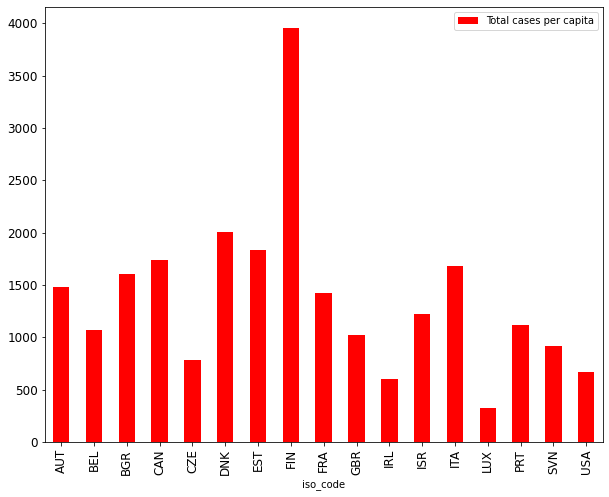

In [19]:
fig = cov_summary_df.plot(kind='bar',  color='red', figsize=(10, 8), fontsize=12).get_figure()

fig.savefig('Original Cases per Capita (total).png')

In [20]:
cov_average = COV_GDP_df.groupby("iso_code").mean()["cases_per_capita"]
cov_average_df=pd.DataFrame()
cov_average_df['Average cases per capita']=cov_average
cov_average_df

,Average cases per capita
iso_code,
AUT,21.799977
BEL,16.274979
BGR,30.814786
CAN,44.581854
CZE,11.128628
DNK,29.961728
EST,32.140676
FIN,119.933227
FRA,20.310173


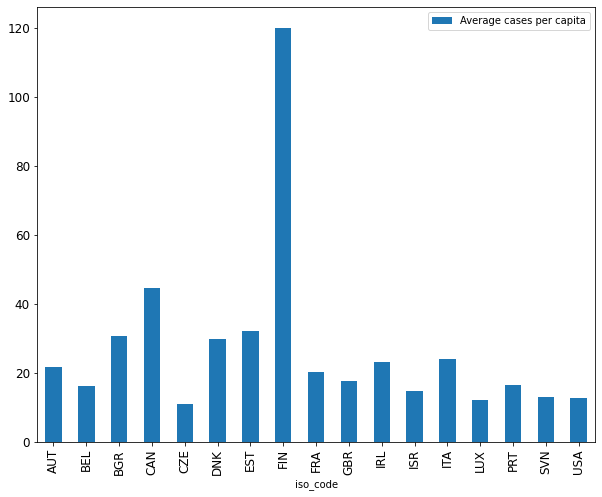

In [21]:
fig = cov_average_df.plot(kind='bar',  figsize=(10, 8), fontsize=12).get_figure()

fig.savefig('Original Cases per Capita(average).png')

In [22]:
# Set X and y values for linear regression model
X = COV_GDP_df[['gdp_per_capita', 'stringency_index', 'new_deaths', 'icu_patients', 'hosp_patients', 'new_tests', 'new_vaccinations']]
y= COV_GDP_df[[ 'cases_per_capita']].values.reshape(-1,1)

In [23]:
### Check the normality of our datasets

<AxesSubplot:>

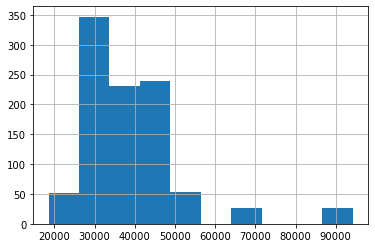

In [24]:
COV_GDP_df['gdp_per_capita'].hist()

<AxesSubplot:>

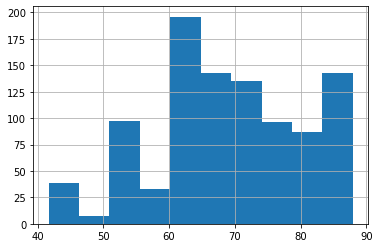

In [25]:
COV_GDP_df['stringency_index'].hist()

<AxesSubplot:>

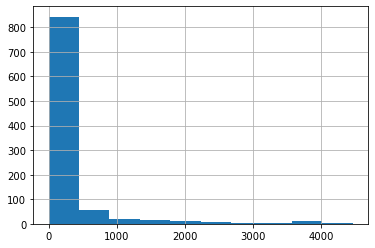

In [26]:
COV_GDP_df['new_deaths'].hist()

<AxesSubplot:>

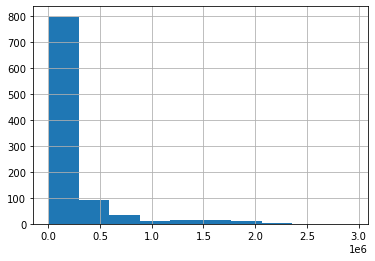

In [27]:
COV_GDP_df['new_tests'].hist()

<AxesSubplot:>

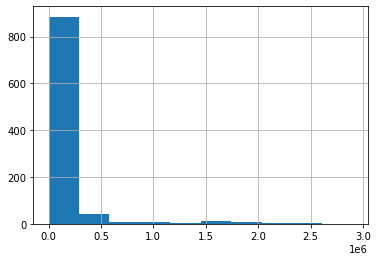

In [28]:
COV_GDP_df['new_vaccinations'].hist()

<AxesSubplot:>

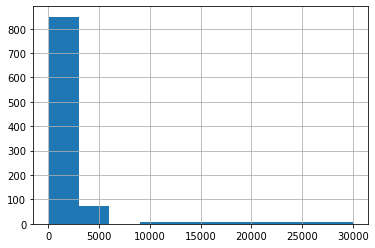

In [29]:
COV_GDP_df['icu_patients'].hist()

<AxesSubplot:>

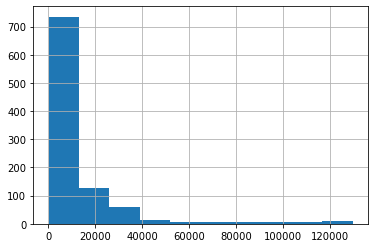

In [30]:
COV_GDP_df['hosp_patients'].hist()

### Split datasets to training and testing sets

In [31]:
# Split data to train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 7) (244, 7) (732, 1) (244, 1)


### Normalize training and testing datasets

In [33]:
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
#(X, norm='l2', *, axis=1, copy=True, return_norm=False)
X_test_norm = normalize(X_test)
print(X_train_norm.shape,X_test_norm.shape)

(732, 7) (244, 7)


#### Build a linear regression model using normalized training datasets

In [34]:
# Build linear regression model using the training set
model = LinearRegression()
model.fit(X_train_norm, y_train)

# Get the model score with both training and testing sets
training_score=model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print(f"The training score is: {(training_score)}")
print(f"The testing score is: {(test_score)}")

The training score is: 0.18759000743588983
The testing score is: 0.2034507363807606


In [35]:
# Predict y_test values (GDP_per_capita) with X_test
predictions = model.predict(X_test_norm)
predictions.shape

(244, 1)

In [36]:
# # Print out the difference between the predicted and real y_test values as error in predictions
error = predictions-y_test
error.shape

(244, 1)

In [37]:
# Find r2 and mse values for the linear regression model
mse = mean_squared_error(y_test, predictions)
r2=r2_score(y_test,predictions)
print(f"r-squared is: {(r2)}")
print(f"The mean. squared error is: {(mse)}")

r-squared is: 0.2034507363807606
The mean. squared error is: 371.360318936216


In [38]:
# Print out the coefficients of the independent variables (predictors: X's) and the model intercept 
print(f"The coefficients of the predictor variables are: {(model.coef_)}")
# Print out the intercept
print(f"The model intercept is: {(model.intercept_)}")

The coefficients of the predictor variables are: [[    60.46597744 -10340.32809378     48.99414983  -2241.81000889
     224.19260334     31.08767109     20.87239811]]
The model intercept is: [-17.98078458]


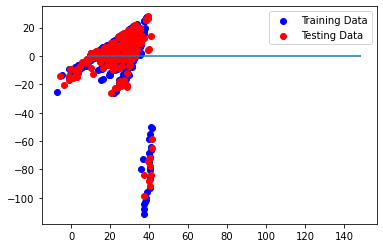

In [39]:
# Plot the real and predicted values on the scatter plot & line graph
plt.scatter(model.predict(X_train_norm), model.predict(X_train_norm) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_norm), model.predict(X_test_norm) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.show()

#### Scatter Plots Plus Line of Fitness

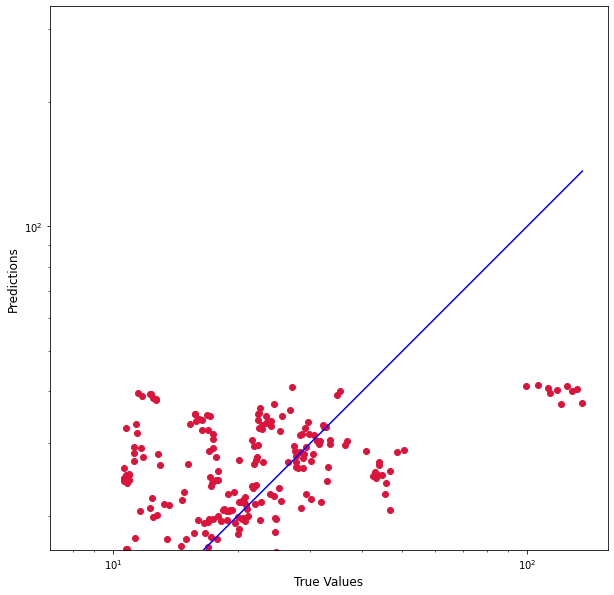

In [40]:
# Plot the true y_test vs. predicted y_test on the scatter plot and include the line of fit
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.axis('equal')
plt.savefig("PredVSTrue.png")
plt.show()

#### Plot graphs of predicted values versus real values of cases per capita

In [41]:
COV_GDP_df_iso= COV_GDP_df[['iso_code', 'gdp_per_capita', 'cases_per_capita']]
COV_GDP_df_iso

iso_train, iso_test = train_test_split(COV_GDP_df_iso, random_state=42)
iso_test

y_test_iso = iso_test['cases_per_capita']

iso_test.reset_index(drop=True, inplace=True)
iso_test

,iso_code,gdp_per_capita,cases_per_capita
0,CAN,44017.591,45.438974
1,IRL,67335.293,22.549073
2,BGR,18563.307,28.697878
3,FRA,38605.671,22.599347
4,AUT,45436.686,19.046209
...,...,...,...
239,FRA,38605.671,16.466253
240,FIN,40585.721,99.497513
241,SVN,31400.840,11.392407
242,AUT,45436.686,22.253740


In [42]:
iso_test.index = iso_test.index.set_names(['number'])
iso_test_IS=iso_test[['iso_code','cases_per_capita' ]]
iso_test_IS.reset_index()
iso_test_IS

,iso_code,cases_per_capita
number,,
0,CAN,45.438974
1,IRL,22.549073
2,BGR,28.697878
3,FRA,22.599347
4,AUT,19.046209
...,...,...
239,FRA,16.466253
240,FIN,99.497513
241,SVN,11.392407


In [43]:
grp_df = pd.DataFrame(predictions)

df = pd.concat([grp_df, iso_test], axis=1)
# df_final = df[['iso_code','cases_per_capita']]
# df_final
df['predicted_cases_per_capita'] = predictions
# df = df[['iso_code','cases_per_capita','predicted_cases_per_capita']]
df = df[['iso_code', 'cases_per_capita', 'predicted_cases_per_capita']]
df

,iso_code,cases_per_capita,predicted_cases_per_capita
0,CAN,45.438974,22.547307
1,IRL,22.549073,35.362434
2,BGR,28.697878,31.575086
3,FRA,22.599347,19.570911
4,AUT,19.046209,20.608611
...,...,...,...
239,FRA,16.466253,0.805317
240,FIN,99.497513,41.256366
241,SVN,11.392407,33.287702
242,AUT,22.253740,27.689963


In [44]:
# Caclculate total cases per capita for the 17 countries
df_final_real = df.groupby("iso_code").mean()["cases_per_capita"]
df_final_pred = df.groupby("iso_code").mean()["predicted_cases_per_capita"]
df_final_Avg = pd.DataFrame()
df_final_Avg['cases_per_capita_Average'] = df_final_real
df_final_Avg['predicted_cases_per_capita_Average'] = df_final_pred
# Round up the numbers to two decimal places
df_final_Avg=df_final_Avg.round({'cases_per_capita_Average': 2, 'predicted_cases_per_capita_Average': 2})
df_final_Avg

,cases_per_capita_Average,predicted_cases_per_capita_Average
iso_code,,
AUT,21.07,23.36
BEL,16.75,32.15
BGR,31.10,28.43
CAN,44.27,24.62
CZE,10.50,9.90
DNK,30.30,30.99
EST,36.76,31.05
FIN,119.25,40.00
FRA,19.35,13.96


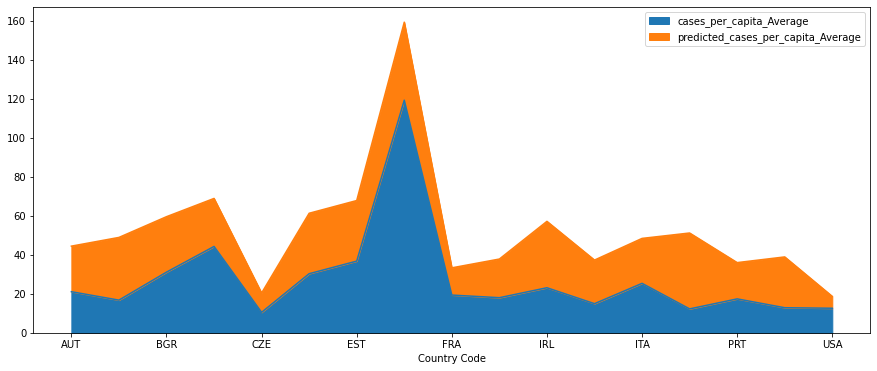

In [45]:
# Subplots to compare average of predicted and real gdp for the 17 countries 
fig, axs = plt.subplots(figsize=(15, 6))        # Create an empty matplotlib Figure and Axes
df_final_Avg.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_xlabel("Country Code")          # Do any matplotlib customization you like
fig.savefig("TrueCASESvsPredCASES.png")           # Save the Figure/Axes using the existing matplotlib method.

In [46]:
import joblib
with open('Covid_LinearRegression_Model.joblib', "wb") as filename: 
    joblib.dump(model, filename) 
# model

###### Limitations
- Sparsity of economic data to project the effects of COVID-19.
-- Most countries stopped the long term economic projection due to COVID-19 effect.
- Bias in data due to differences in testing rates and interventions between countries.

## Linear regression model with scaled training and testing datasets

In [47]:
# Scale your data
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [48]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
X_train_scaled

array([[ 0.51417779,  1.09448461, -0.34747557, ..., -0.44238479,
        -0.48563488, -0.3458712 ],
       [-0.0101738 , -0.44287497,  0.68663921, ...,  0.68214515,
         0.38202368, -0.19644102],
       [-0.82911348,  1.55519442,  0.03437428, ..., -0.20819424,
        -0.46997556, -0.33931063],
       ...,
       [-0.56321967,  0.01783484, -0.39947847, ..., -0.51362578,
        -0.44750012, -0.33709348],
       [ 0.14181567, -1.1733698 , -0.41136485, ..., -0.53280795,
        -0.48671975, -0.296885  ],
       [ 0.3009289 , -0.75001484, -0.35044717, ..., -0.45256914,
        -0.39327533, -0.25942674]])

In [50]:
# Build linear regression model using the training set
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Get the model score with both training and testing sets
training_score_scaled=model_scaled.score(X_train_scaled, y_train)
test_score_scaled = model_scaled.score(X_test_scaled, y_test)
print(f"The training score is: {(training_score_scaled)}")
print(f"The testing score is: {(test_score_scaled)}")

The training score is: 0.11142921028174413
The testing score is: 0.11509624629991


## Linear regression model without normalizing or scaling training and testing datasets

In [51]:
# Build linear regression model using the training set
model_lm = LinearRegression()
model_lm.fit(X_train, y_train)

# Get the model score with both training and testing sets
training_score_lm=model_lm.score(X_train, y_train)
test_score_lm = model_lm.score(X_test, y_test)
print(f"The training score is: {(training_score_lm)}")
print(f"The testing score is: {(test_score_lm)}")

The training score is: 0.11142921028174424
The testing score is: 0.11509624629974857


** Scaling the train and test data results in a model with similar performance as the model without scaling the data.

In [52]:
# Predict y_test values (GDP_per_capita) with X_test
predictions_lm = model_lm.predict(X_test)
predictions_lm.shape

(244, 1)

In [53]:
y_test.shape

(244, 1)

In [54]:
# # Print out the difference between the predicted and real y_test values as error in predictions
error_lm= predictions_lm-y_test
error_lm.shape

(244, 1)

In [55]:
# Find r2 and mse values for the linear regression model
mse_lm = mean_squared_error(y_test, predictions_lm)
r2_lm=r2_score(y_test,predictions_lm)
print(f"The r-squared value is: {(r2_lm)}")
print(f"The mean squared error is: {(mse_lm)}")

The r-squared value is: 0.11509624629974857
The mean squared error is: 412.5521863002609


In [56]:
# Print out the coefficients of the independent variables (predictors: X's)
print(f"The co-efficients of the predictor variables are: {(model_lm.coef_)}")
print(f"The model intercept is: {(model_lm.intercept_)}")

The co-efficients of the predictor variables are: [[ 6.76134844e-05 -4.96481308e-01  1.69776645e-03 -1.02384755e-03
   6.01611497e-05  2.42109316e-06 -3.91412763e-06]]
The model intercept is: [56.29913303]


In [57]:
 # Equation of the linear model - show the equation on the html page

In [58]:
# Write out the equation of the model
# y = mx + c
# print('cases_per_capita = 56.3 + 6.76e-05gdp_per_capita - 4.96e-01stringency_index + 1.7e-03new_deaths -1.02e-03icu_patients + 6.02e-05hosp_patients + 2.42e-06new_tests -3.91e-06new_vaccinations  ')

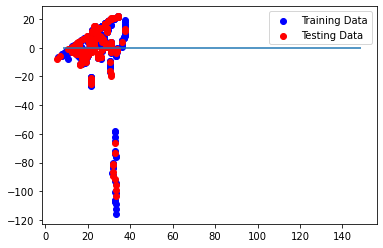

In [59]:
# Plot the real and predicted values on the scatter plot & line graph
plt.scatter(model_lm.predict(X_train), model_lm.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model_lm.predict(X_test), model_lm.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.show()

In [60]:
# Scatter plot plus line of fitness - include this chart too on the html page

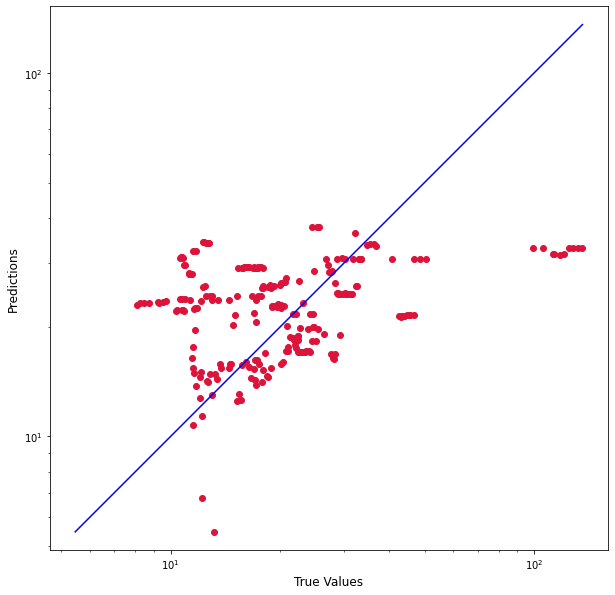

In [61]:
# Plot the true y_test vs. predicted y_test on the scatter plot and include the line of fit
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions_lm, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predictions_lm), max(y_test))
p2 = min(min(predictions_lm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.axis('equal')
plt.savefig("PredVSTrue.png")
plt.show()

# Trying another Linear regression technique

In [62]:
# Import dependency for linear model 
from sklearn import linear_model

In [63]:
# Build and fit the linear model
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train_norm,y_train)

In [64]:
# Predict y_test values using X_test values
y_pred1 = lm.predict(X_test_norm)
print(y_pred1)[0:5]

[[22.5473066 ]
 [35.36243372]
 [31.57508591]
 [19.5709111 ]
 [20.60861114]
 [14.88171977]
 [17.60777703]
 [20.88188732]
 [19.651569  ]
 [21.55609086]
 [20.56623702]
 [22.54513764]
 [33.57051602]
 [15.9185568 ]
 [18.09059628]
 [19.35456218]
 [30.74220609]
 [18.22372464]
 [25.19513181]
 [-5.71586033]
 [35.12954046]
 [34.13370662]
 [-1.27334384]
 [32.76903077]
 [40.07393015]
 [38.17584303]
 [29.54609786]
 [31.66335672]
 [37.55180716]
 [-0.50193668]
 [29.61461863]
 [29.58308144]
 [41.35379969]
 [ 7.45214398]
 [18.64799112]
 [-3.57085135]
 [ 7.29357359]
 [21.63160979]
 [21.57428002]
 [19.7013007 ]
 [39.21698251]
 [40.10891577]
 [13.53397989]
 [24.67959964]
 [26.13229089]
 [21.21317087]
 [ 2.28464479]
 [33.2680902 ]
 [21.21433997]
 [18.32573201]
 [ 4.47904995]
 [20.1433152 ]
 [19.96926069]
 [24.3390975 ]
 [30.30546705]
 [30.29762021]
 [28.15640124]
 [19.27425216]
 [33.12603331]
 [10.27566583]
 [12.71861312]
 [26.48601352]
 [ 7.97015008]
 [23.66197771]
 [13.20845091]
 [ 2.94602149]
 [27.33345

TypeError: 'NoneType' object is not subscriptable

In [65]:
# Print the score of the model using both training and testing datasets
test_score = lm.score(X_test_norm,y_test)
train_score = lm.score(X_train_norm,y_train)
print(train_score, test_score)

0.18759000743588983 0.2034507363807606


In [66]:
# Print the co-efficients of the independent variables in the model
print(lm.coef_)

[[    60.46597744 -10340.32809378     48.99414983  -2241.81000889
     224.19260334     31.08767109     20.87239811]]


In [67]:
# Print the intercept of the model
print(lm.intercept_)

[-17.98078458]


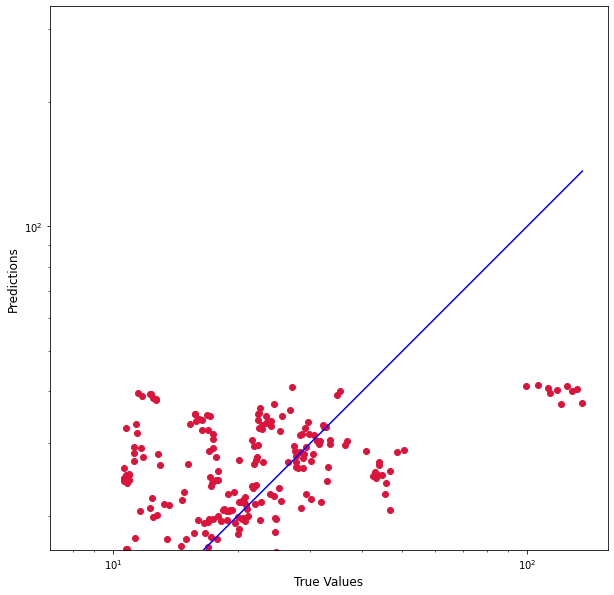

In [68]:
# Plot the true y_test vs. predicted y_test on the scatter plot and include the line of fit
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred1), max(y_test))
p2 = min(min(y_pred1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.xticks()
plt.yticks()
plt.axis('equal')
plt.show()

In [69]:
model.score(X_test_norm, y_test)

0.2034507363807606

## Using OLS Technique (statsmodels)

In [70]:
from statsmodels.regression import linear_model
import statsmodels.api as sm

In [71]:
# Add constant so that the model comes with an intercept value
x= sm.add_constant(X_train)

In [72]:
x
# x=pd.DataFrame()
# x

,const,gdp_per_capita,stringency_index,new_deaths,icu_patients,hosp_patients,new_tests,new_vaccinations
4624,1.0,45436.686,82.41,46.0,369.0,1957.0,19780.0,4372.0
24718,1.0,38605.671,63.89,742.0,2678.0,24703.0,342091.0,53707.0
54298,1.0,27936.896,87.96,303.0,858.0,6694.0,25597.0,6538.0
24708,1.0,38605.671,63.89,156.0,2632.0,24458.0,231902.0,42.0
18594,1.0,46682.515,60.19,2.0,39.0,232.0,159348.0,17988.0
...,...,...,...,...,...,...,...,...
7294,1.0,42658.576,60.19,34.0,302.0,1698.0,44898.0,9975.0
17803,1.0,32605.906,72.22,130.0,1104.0,5987.0,63390.0,22115.0
60816,1.0,31400.840,69.44,11.0,83.0,516.0,33946.0,7270.0
24327,1.0,40585.721,55.09,3.0,23.0,128.0,19377.0,20545.0


In [73]:
olsr_results = linear_model.OLS(y_train, x).fit()
print('Training completed')

print(olsr_results.summary())

Training completed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           8.88e-16
Time:                        15:06:47   Log-Likelihood:                -3172.9
No. Observations:                 732   AIC:                             6362.
Df Residuals:                     724   BIC:                             6399.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               5

In [74]:
# There is indication of strong multicollinearity. Calculate VIF to check the linearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# For each X, calculate VIF and save in dataframe
# VIF>10 indicates presence of significant multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,VIF Factor,Features
0,41.767320,const
1,1.123931,gdp_per_capita
2,1.195456,stringency_index
3,13.382278,new_deaths
4,23.782701,icu_patients
5,18.243860,hosp_patients
6,5.305052,new_tests
7,2.809051,new_vaccinations


In [76]:
# Remove features with VIF > 10, then rerun the model
x_2 = x [['const','gdp_per_capita', 'stringency_index', 'new_tests', 'new_vaccinations']]
x_2

,const,gdp_per_capita,stringency_index,new_tests,new_vaccinations
4624,1.0,45436.686,82.41,19780.0,4372.0
24718,1.0,38605.671,63.89,342091.0,53707.0
54298,1.0,27936.896,87.96,25597.0,6538.0
24708,1.0,38605.671,63.89,231902.0,42.0
18594,1.0,46682.515,60.19,159348.0,17988.0
...,...,...,...,...,...
7294,1.0,42658.576,60.19,44898.0,9975.0
17803,1.0,32605.906,72.22,63390.0,22115.0
60816,1.0,31400.840,69.44,33946.0,7270.0
24327,1.0,40585.721,55.09,19377.0,20545.0


In [77]:
olsr_results = linear_model.OLS(y_train, x_2).fit()
print('Training completed')

print(olsr_results.summary())

Training completed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     21.76
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           5.65e-17
Time:                        15:06:50   Log-Likelihood:                -3174.8
No. Observations:                 732   AIC:                             6360.
Df Residuals:                     727   BIC:                             6383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               5

In [78]:
# For each X, calculate VIF and save in dataframe
# VIF>10 indicates presence of significant multicollinearity
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(x_2.values, i) for i in range(x_2.shape[1])]
vif_2["Features"] = x_2.columns
vif_2

,VIF Factor,Features
0,40.680317,const
1,1.080094,gdp_per_capita
2,1.067004,stringency_index
3,2.343197,new_tests
4,2.253571,new_vaccinations


In [79]:
### Compute predictions
olsr_predictions = olsr_results.get_prediction(x_2)
olsr_predictions

* linearmodel and statmodel Models did not perform better than the model fitted with LinearRegression()